In [1]:
import openai
from openai import OpenAI
import pandas as pd
import os

In [2]:
test_df = pd.read_csv("C:/Users/durge/Documents/TY-Sem 6/IPD Implementation/GPT Turbo Chatbot/Chatbot/FineTuning/test.csv")
test_df.head()

,questionText,topic,answerText
0,I’m facing severe depression and anxiety and I...,depression,"First, be patient because anxiety and depressi..."
1,I'm not suicidal and wouldn't take my own life...,depression,"Sounds like a sign of great unhappiness, or sa..."
2,I'm in my mid 20s with a husband and children....,depression,Good for you on being sensitive to your human ...
3,There are many people willing to lovingly prov...,depression,"From the little bit you wrote, my guess is you..."
4,I've become so jaded that I can't control my t...,depression,Maybe your thoughts require your attention and...


In [3]:
len(test_df)

84

In [4]:
len(test_df[test_df["questionText"].str.len() < 300])

50

In [69]:
chatbot_eval_df = test_df[test_df["questionText"].str.len() < 300]
chatbot_eval_df.reset_index(drop=True, inplace=True)
chatbot_eval_df.head()

,questionText,topic,answerText
0,I’m facing severe depression and anxiety and I...,depression,"First, be patient because anxiety and depressi..."
1,There are many people willing to lovingly prov...,depression,"From the little bit you wrote, my guess is you..."
2,I've become so jaded that I can't control my t...,depression,Maybe your thoughts require your attention and...
3,After he got home from the hospital he was ang...,depression,Since as husband and wife your lives are close...
4,I have terrible anxiety and depression. I've t...,depression,Is it possible you simply didn't mix well with...


In [72]:
chatbot_eval_df.shape

(50, 3)

In [70]:
len(chatbot_eval_df["topic"].unique())

15

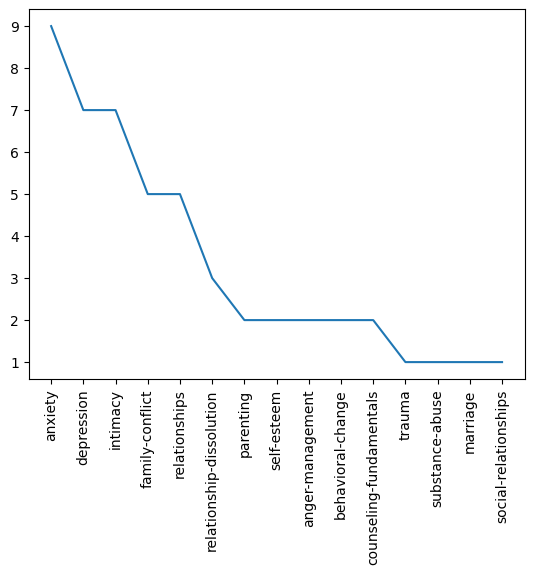

In [71]:
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
plt.plot(chatbot_eval_df["topic"].value_counts())

In [47]:
# chatbot_responses = []

# client = OpenAI(api_key = os.getenv('OPENAI_API_KEY'))

# for ques in chatbot_eval_df["questionText"]:

#     completion = client.chat.completions.create(
#         model = "ft:gpt-3.5-turbo-0125:personal:therapistbot-2:9AMcj2pW",
#         messages = [ {"role": "user", "content": ques}],
#         )
    
#     chatbot_responses.append(completion.choices[0].message.content)

In [63]:
# chatbot_eval_ques["questionText"][10:]

In [73]:
# print(chatbot_eval_df[40])
# print()
# print()

In [74]:
len(chatbot_responses)

50

In [75]:
print(chatbot_responses)

["Anxiety usually about some sort of anticipated loss or fear of not being good enough to accomplish some task or in relationship to someone with whom the person lives.The way to overcome is to understand that these fears are inside of you right now bc of the way you imagine the current or upcoming situation.It doesn't necessarily have anything to do with the way the other person treats you. Plus, it is possible that your anxiety is a symptom of not feeling completely safe in your living environment.", "As long as you have friends to love and appreciate you, then your feelings of not belonging are more likely to be rooted in a temporary situation or in a way of being which is not characteristic of who you are.In a broad way, examine your own philosophy of life and the reasons and principles which organize your thoughts and emotions in response to events and circumstances.Since you would not be among friends who love and appreciate you, then the next best option is to love and appreciat

In [76]:
chatbot_eval_df["ChatbotAnswers"] = chatbot_responses
chatbot_eval_df.head()

C:\Users\durge\AppData\Local\Temp\ipykernel_25876\388304365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chatbot_eval_df["ChatbotAnswers"] = chatbot_responses


,questionText,topic,answerText,ChatbotAnswers
0,I’m facing severe depression and anxiety and I...,depression,"First, be patient because anxiety and depressi...",Anxiety usually about some sort of anticipated...
1,There are many people willing to lovingly prov...,depression,"From the little bit you wrote, my guess is you...",As long as you have friends to love and apprec...
2,I've become so jaded that I can't control my t...,depression,Maybe your thoughts require your attention and...,Anxiety usually about some upcoming circumstan...
3,After he got home from the hospital he was ang...,depression,Since as husband and wife your lives are close...,Your question reads as though you are the one ...
4,I have terrible anxiety and depression. I've t...,depression,Is it possible you simply didn't mix well with...,Probably what you need is a new approach to fi...


In [77]:
# chatbot_eval_df.to_csv("chatbot_eval_df.csv", index=False)

In [78]:
cc_full_df = pd.read_csv("FineTuning/counsel_chat_data.csv")
cc_full_df.head(3)

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train


In [74]:
cc_full_df.loc[0, "therapistInfo"]

'Sherry Katz, LCSWCouples and Family Therapist, LCSW'

In [75]:
cc_full_df.columns

Index(['Unnamed: 0', 'questionID', 'questionTitle', 'questionText',
       'questionLink', 'topic', 'therapistInfo', 'therapistURL', 'answerText',
       'upvotes', 'views', 'split'],
      dtype='object')

In [79]:
cc_full_df = cc_full_df[cc_full_df["therapistInfo"] == "Sherry Katz, LCSWCouples and Family Therapist, LCSW"]
cc_full_df.drop(columns=['Unnamed: 0', 'questionID', 'questionTitle','questionLink', 'therapistURL', 'upvotes', 'views', 'split'], inplace=True)
cc_full_df.reset_index(drop=True, inplace=True)
cc_full_df.head()

,questionText,topic,therapistInfo,answerText
0,I'm going through some things with my feelings...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...","If everyone thinks you're worthless, then mayb..."
1,I have so many issues to address. I have a his...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",Everyone has topics to discuss when they start...
2,I have been feeling more and more down for ove...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",Answers about our inner lives are most success...
3,I’m facing severe depression and anxiety and I...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...","First, be patient because anxiety and depressi..."
4,How can I get to a place where I can be conten...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",Your question is a fascinating one!As humans w...


In [89]:
new_df = pd.merge(cc_full_df, test_df, how="inner", on="questionText")
new_df.head()

,questionText,topic,therapistInfo,answerText_x,answerText_y
0,I’m facing severe depression and anxiety and I...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...","First, be patient because anxiety and depressi...","First, be patient because anxiety and depressi..."
1,I'm not suicidal and wouldn't take my own life...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...","Sounds like a sign of great unhappiness, or sa...","Sounds like a sign of great unhappiness, or sa..."
2,I'm in my mid 20s with a husband and children....,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",Good for you on being sensitive to your human ...,Good for you on being sensitive to your human ...
3,There are many people willing to lovingly prov...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...","From the little bit you wrote, my guess is you...","From the little bit you wrote, my guess is you..."
4,I've become so jaded that I can't control my t...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",Maybe your thoughts require your attention and...,Maybe your thoughts require your attention and...


In [98]:
new_df["topic"].value_counts()

depression                  14
anxiety                     13
intimacy                    13
relationships               11
parenting                    6
family-conflict              6
relationship-dissolution     5
behavioral-change            3
self-esteem                  3
anger-management             2
trauma                       2
diagnosis                    2
counseling-fundamentals      2
substance-abuse              1
workplace-relationships      1
marriage                     1
lgbtq                        1
self-harm                    1
social-relationships         1
Name: topic, dtype: int64

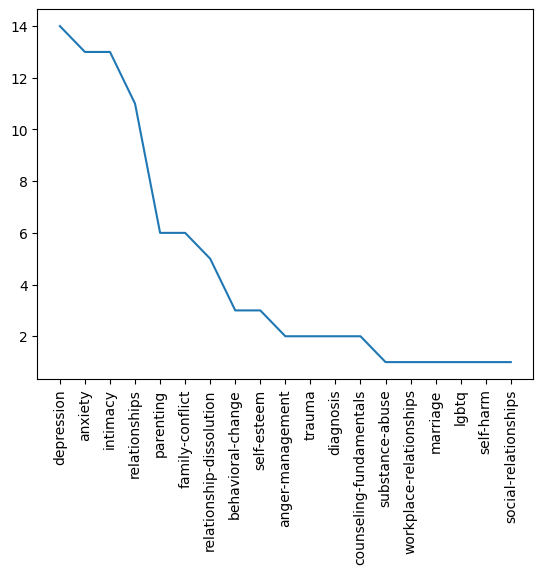

In [106]:
plt.xticks(rotation=90)
plt.plot(new_df["topic"].value_counts(), label="test_topics")
# plt.plot(new_df["topic"].value_counts(), label="test_topics")